In [360]:
! pip install Boruta

     |████████████████████████████████| 56 kB 431 kB/s            
You should consider upgrading via the '/Users/admin/Documents/MscProject/venv/bin/python -m pip install --upgrade pip' command.


In [35]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


## Granger causality, machine learning

In [243]:
gci_data = np.load('gci_nls_cc200_vector.npy')

In [247]:
gci_df = pd.DataFrame(gci_data)
gci_df.head()

,0,1,2,3,4,5,6,7,8,9,...,39991,39992,39993,39994,39995,39996,39997,39998,39999,40000
0,1.0,0.232827,0.310001,0.022694,0.171940,0.201924,1.564648,0.507979,0.157911,0.261360,...,0.000000,0.000000,0.365369,0.0,0.159129,0.000000,0.000000,0.000000,1.0,1.0
1,1.0,0.000000,0.000000,0.034329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.0,1.0
2,1.0,0.000000,0.211977,0.063180,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.300281,0.064557,0.000000,0.0,0.314101,0.000000,0.087941,0.244485,1.0,1.0
3,1.0,0.003462,0.176266,0.119884,0.000000,0.000000,0.061226,0.000000,0.272025,0.083786,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.130785,0.000000,1.0,1.0
4,1.0,0.348111,0.137865,0.170946,0.007856,0.477393,0.028955,0.093623,0.025476,0.086795,...,0.082194,0.000000,0.270727,0.0,0.139575,0.108761,0.019303,0.329178,1.0,1.0


In [248]:
gci_df.iloc[:,-1]=gci_df.iloc[:,-1].astype(int)

/var/folders/0k/w62sf0c17hs15h730mmdkmj40000gn/T/ipykernel_64877/4089041766.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  gci_df.iloc[:,-1]=gci_df.iloc[:,-1].astype(int)


In [249]:
diagonals = [i for i in range(gci_df.shape[1]) if len(gci_df.iloc[:,i].unique())==1.0] # get indexes of columns containing diagonal values

In [251]:
gci_df.drop(diagonals, axis=1, inplace=True) #drop columns containing diagonal data

In [252]:
gci_df.head()

,1,2,3,4,5,6,7,8,9,10,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,40000
0,0.232827,0.310001,0.022694,0.171940,0.201924,1.564648,0.507979,0.157911,0.261360,0.02722,...,0.000000,0.000000,0.000000,0.365369,0.0,0.159129,0.000000,0.000000,0.000000,1
1,0.000000,0.000000,0.034329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1
2,0.000000,0.211977,0.063180,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.140119,0.300281,0.064557,0.000000,0.0,0.314101,0.000000,0.087941,0.244485,1
3,0.003462,0.176266,0.119884,0.000000,0.000000,0.061226,0.000000,0.272025,0.083786,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.130785,0.000000,1
4,0.348111,0.137865,0.170946,0.007856,0.477393,0.028955,0.093623,0.025476,0.086795,0.00000,...,0.000000,0.082194,0.000000,0.270727,0.0,0.139575,0.108761,0.019303,0.329178,1


In [255]:
X = gci_df.iloc[:,:-1].to_numpy()
y = np.array([1 if i==1 else 0 for i in gci_df.iloc[:,-1]])

In [270]:
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=2)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features - 5 features should be selected
feat_selector.fit(X, y)

# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	39800
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	39800
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	39800
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	39800
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	39800
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	39800
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	39800
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	39796
Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	39796
Iteration: 	10 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	39796
Iteration: 	11 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	39796
Iteration: 	12 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	39796
Iteration: 	13 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	39796
Iteration: 	14 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	39796
Iteration: 	15 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	39796
Iteration: 	16 / 10

In [271]:
np.c_[X_filtered,y]

array([[0.        , 0.        , 0.17419931, 0.        , 1.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.06850366, 0.        , 1.        ],
       ...,
       [0.19721642, 0.06062376, 0.34622007, 0.        , 1.        ],
       [0.02483044, 0.01356252, 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 0.63635521, 1.        ]])

In [268]:
len(X_filtered[:,0])

1026

<AxesSubplot: >

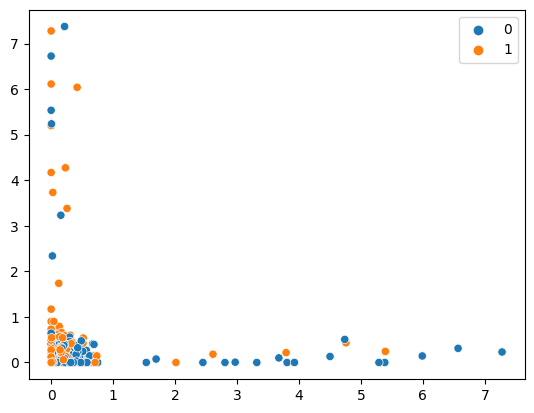

In [269]:
sns.scatterplot(x=X_filtered[:,0], y=X_filtered[:,1], hue=y)

In [277]:
cv = StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.2)
scores = []
for train, test in cv.split(X_filtered, y):
    # *ConnectivityMeasure* can output the estimated subjects coefficients
    # as a 1D arrays through the parameter *vectorize*.

    classifier = SVC(kernel='rbf').fit(X_filtered[train], y[train])
    # make predictions for the left-out test subjects
    predictions = classifier.predict(X_filtered[test])
    # store the accuracy for this cross-validation fold
    score = accuracy_score(y[test], predictions)
    scores.append(score)

In [278]:
np.mean(scores)

0.5456310679611651

## Large scale granger causality, machine learning

In [47]:
data = np.load('/Users/admin/Documents/MscProject/gci_cc200_vectorised.npy')

In [48]:
df = pd.DataFrame(data)

In [49]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,39991,39992,39993,39994,39995,39996,39997,39998,39999,40000
0,1.0,0.000000,0.000000,0.000000,0.000000,0.009432,0.000000,0.000000,0.001403,0.000000,...,0.000939,0.000000,0.000622,0.000000,0.000000,0.018050,0.000826,0.003743,1.0,1.0
1,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014210,0.019196,0.000000,...,0.000000,0.000000,0.000582,0.001591,0.000000,0.005735,0.000092,0.031975,1.0,1.0
2,1.0,0.000000,0.001848,0.000000,0.000000,0.012329,0.003704,0.003097,0.005602,0.005504,...,0.005032,0.002467,0.000460,0.005617,0.004939,0.008758,0.000000,0.020097,1.0,1.0
3,1.0,0.000000,0.000625,0.000339,0.000000,0.000000,0.000000,0.000000,0.005610,0.000000,...,0.000000,0.000000,0.001647,0.000000,0.001952,0.000000,0.000655,0.010060,1.0,1.0
4,1.0,0.000719,0.000000,0.000378,0.007974,0.022800,0.000151,0.010994,0.000000,0.003348,...,0.000000,0.003095,0.003939,0.001385,0.000000,0.000000,0.005272,0.000000,1.0,1.0


In [50]:
df.iloc[:,-1]=df.iloc[:,-1].astype(int)

/var/folders/0k/w62sf0c17hs15h730mmdkmj40000gn/T/ipykernel_64877/3430961961.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,-1]=df.iloc[:,-1].astype(int)


In [51]:
diagonals = [i for i in range(df.shape[1]) if len(df.iloc[:,i].unique())==1] # get indexes of columns containing diagonal values

In [52]:
df.drop(diagonals, axis=1, inplace=True) #drop columns containing diagonal data

In [53]:
df

,1,2,3,4,5,6,7,8,9,10,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,40000
0,0.000000,0.000000,0.000000,0.000000,0.009432,0.000000,0.000000,0.001403,0.000000,0.000000,...,0.003441,0.000939,0.000000,0.000622,0.000000,0.000000,0.018050,0.000826,0.003743,1
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014210,0.019196,0.000000,0.000000,...,0.000066,0.000000,0.000000,0.000582,0.001591,0.000000,0.005735,0.000092,0.031975,1
2,0.000000,0.001848,0.000000,0.000000,0.012329,0.003704,0.003097,0.005602,0.005504,0.000000,...,0.000000,0.005032,0.002467,0.000460,0.005617,0.004939,0.008758,0.000000,0.020097,1
3,0.000000,0.000625,0.000339,0.000000,0.000000,0.000000,0.000000,0.005610,0.000000,0.000219,...,0.037120,0.000000,0.000000,0.001647,0.000000,0.001952,0.000000,0.000655,0.010060,1
4,0.000719,0.000000,0.000378,0.007974,0.022800,0.000151,0.010994,0.000000,0.003348,0.000000,...,0.000000,0.000000,0.003095,0.003939,0.001385,0.000000,0.000000,0.005272,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,0.002805,0.000000,0.000000,0.000098,0.000000,0.000000,0.002056,0.000000,0.001238,0.004056,...,0.007953,0.000675,0.009182,0.014095,0.000000,0.000000,0.000000,0.005108,0.000000,1
1022,0.000000,0.008851,0.001434,0.004161,0.006538,0.000000,0.000453,0.005415,0.000662,0.000000,...,0.003379,0.016427,0.000000,0.000000,0.000000,0.007626,0.007087,0.000000,0.004480,1
1023,0.000000,0.000718,0.001614,0.000000,0.000000,0.002350,0.000000,0.004809,0.004014,0.000000,...,0.004236,0.000000,0.000000,0.008340,0.000320,0.003060,0.010233,0.011922,0.002335,1
1024,0.015773,0.000000,0.000000,0.000000,0.000000,0.009825,0.009090,0.000000,0.001475,0.009274,...,0.002308,0.005384,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [54]:
X = df.iloc[:,:-1].to_numpy()
y = np.array([1 if i==1 else 0 for i in df.iloc[:,-1]])

In [55]:
kpca = PCA(n_components=0.60)
kpca.fit(X)

PCA(n_components=0.6)

In [56]:
features = kpca.transform(X)

In [57]:
features

array([[ 0.19199043,  0.08117812,  0.01683551, ...,  0.00827599,
         0.02719637,  0.01064703],
       [ 0.11673179,  0.20474664,  0.06622118, ...,  0.00725239,
        -0.02842953, -0.003269  ],
       [ 0.28208514,  0.05810256,  0.10390982, ...,  0.02404216,
         0.0116526 ,  0.01130496],
       ...,
       [ 0.02522307,  0.03057172, -0.12135646, ..., -0.12808825,
        -0.0201539 , -0.00574662],
       [ 0.11029762, -0.14313994, -0.10962507, ...,  0.13313592,
         0.09382017,  0.02411624],
       [ 0.19534193, -0.09219146, -0.09119775, ..., -0.06590279,
         0.0048919 ,  0.02950453]])

In [58]:

cv = StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.2)

for train, test in cv.split(features, y):
        # *ConnectivityMeasure* can output the estimated subjects coefficients
        # as a 1D arrays through the parameter *vectorize*.

    classifier = LinearSVC().fit(X[train], y[train])
        # make predictions for the left-out test subjects
    predictions = classifier.predict(X[test])
        # store the accuracy for this cross-validation fold
    score= accuracy_score(y[test], predictions)

In [59]:
score

0.5388349514563107

In [60]:
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features - 5 features should be selected
feat_selector.fit(X, y)

# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	39800
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	39800
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	39800
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	39800
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	39800
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	39800
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	39800
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	39796
Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	39796
Iteration: 	10 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	39796
Iteration: 	11 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	39796
Iteration: 	12 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	39796
Iteration: 	13 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	39796
Iteration: 	14 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	39796
Iteration: 	15 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	39796
Iteration: 	16 / 10

In [63]:

cv = StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.2)

for train, test in cv.split(X_filtered, y):
        # *ConnectivityMeasure* can output the estimated subjects coefficients
        # as a 1D arrays through the parameter *vectorize*.

    classifier = RandomForestClassifier().fit(X_filtered[train], y[train])
        # make predictions for the left-out test subjects
    predictions = classifier.predict(X_filtered[test])
        # store the accuracy for this cross-validation fold
    score= accuracy_score(y[test], predictions)

In [64]:
score

0.5048543689320388

In [65]:
cv = StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.2)

for train, test in cv.split(X_filtered, y):
    # *ConnectivityMeasure* can output the estimated subjects coefficients
    # as a 1D arrays through the parameter *vectorize*.

    classifier = SVC(kernel='rbf').fit(X_filtered[train], y[train])
    # make predictions for the left-out test subjects
    predictions = classifier.predict(X_filtered[test])
    # store the accuracy for this cross-validation fold
    score = accuracy_score(y[test], predictions)

In [66]:
score

0.5631067961165048

In [67]:
cv = StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.2)

for train, test in cv.split(X_filtered, y):
    # *ConnectivityMeasure* can output the estimated subjects coefficients
    # as a 1D arrays through the parameter *vectorize*.

    classifier = LinearSVC().fit(X_filtered[train], y[train])
    # make predictions for the left-out test subjects
    predictions = classifier.predict(X_filtered[test])
    # store the accuracy for this cross-validation fold
    score = accuracy_score(y[test], predictions)

In [92]:
score

0.5194174757281553

## FC machine

In [196]:
data = np.load('/Users/admin/Documents/MscProject/fc_cc200_vectorised.npy')

In [95]:
df = pd.DataFrame(data)

In [96]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,19891,19892,19893,19894,19895,19896,19897,19898,19899,19900
0,-0.318127,-0.069796,-0.036556,-0.163779,0.154582,-0.468522,0.149931,0.085749,-0.091261,-0.097561,...,-0.013454,0.288202,0.346534,0.169769,0.402399,0.235802,0.328523,0.022539,0.275308,1.0
1,0.248915,0.138000,-0.209563,-0.142492,-0.541118,-0.220420,-0.038429,-0.579570,-0.276240,0.080674,...,0.047489,-0.217907,0.152274,-0.022263,0.387047,0.030468,0.100718,0.109483,-0.272489,1.0
2,0.138845,0.060143,-0.074200,-0.062667,0.065521,0.034017,-0.131597,-0.272950,-0.267307,0.056912,...,0.064907,-0.101845,0.258160,-0.350446,0.157305,-0.163685,-0.071646,0.114257,-0.299283,1.0
3,-0.255444,0.107162,-0.054165,0.085518,-0.007979,-0.277307,-0.052372,0.300137,0.187776,-0.014143,...,0.168408,0.214707,0.010837,-0.220701,0.121951,0.140008,-0.150833,0.227749,-0.012394,1.0
4,-0.377935,-0.060415,-0.005243,-0.431189,-0.117298,-0.135625,0.153580,0.104868,0.151153,-0.198125,...,-0.043606,-0.051302,-0.137138,-0.207220,-0.160206,-0.037513,0.401884,0.275285,-0.304601,1.0


In [97]:
df.iloc[:,-1]=df.iloc[:,-1].astype(int)

/var/folders/0k/w62sf0c17hs15h730mmdkmj40000gn/T/ipykernel_64877/4128129977.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,-1]=df.iloc[:,-1].astype(int)


In [98]:
X = df.iloc[:,:-1].to_numpy()
y = np.array([1 if i==1 else 0 for i in df.iloc[:,-1]])

In [100]:
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features - 5 features should be selected
feat_selector.fit(X, y)

# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	19900
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	19900
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	19900
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	19900
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	19900
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	19900
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	19900
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	496
Rejected: 	19404
Iteration: 	9 / 100
Confirmed: 	110
Tentative: 	386
Rejected: 	19404
Iteration: 	10 / 100
Confirmed: 	110
Tentative: 	386
Rejected: 	19404
Iteration: 	11 / 100
Confirmed: 	110
Tentative: 	386
Rejected: 	19404
Iteration: 	12 / 100
Confirmed: 	126
Tentative: 	308
Rejected: 	19466
Iteration: 	13 / 100
Confirmed: 	126
Tentative: 	308
Rejected: 	19466
Iteration: 	14 / 100
Confirmed: 	126
Tentative: 	308
Rejected: 	19466
Iteration: 	15 / 100
Confirmed: 	126
Tentative: 	308
Reject

In [236]:
cv = StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.2)
scores = []
for train, test in cv.split(X_filtered, y):
        # *ConnectivityMeasure* can output the estimated subjects coefficients
        # as a 1D arrays through the parameter *vectorize*.

    classifier = RandomForestClassifier().fit(X_filtered[train], y[train])
        # make predictions for the left-out test subjects
    predictions = classifier.predict(X_filtered[test])
        # store the accuracy for this cross-validation fold
    score= accuracy_score(y[test], predictions)
    scores.append(score)

In [237]:
np.mean(scores)

0.7300970873786408

In [239]:
cv = StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.2)
scores = []
for train, test in cv.split(X_filtered, y):
    # *ConnectivityMeasure* can output the estimated subjects coefficients
    # as a 1D arrays through the parameter *vectorize*.

    classifier = SVC(kernel='rbf').fit(X_filtered[train], y[train])
    # make predictions for the left-out test subjects
    predictions = classifier.predict(X_filtered[test])
    # store the accuracy for this cross-validation fold
    score = accuracy_score(y[test], predictions)
    scores.append(score)

In [240]:
np.mean(scores)

0.7485436893203883

In [105]:
cv = StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.2)

for train, test in cv.split(X_filtered, y):
    # *ConnectivityMeasure* can output the estimated subjects coefficients
    # as a 1D arrays through the parameter *vectorize*.

    classifier = LinearSVC().fit(X_filtered[train], y[train])
    # make predictions for the left-out test subjects
    predictions = classifier.predict(X_filtered[test])
    # store the accuracy for this cross-validation fold
    score = accuracy_score(y[test], predictions)

In [106]:
score

0.6941747572815534

In [273]:
X_train,y_train, X_val, y_val = train_test_split(X_filtered,y, test_size=0.2, random_state=2, shuffle=True)

In [274]:
X_train

array([[0.        , 0.        , 0.        , 0.        ],
       [0.26037874, 0.        , 0.        , 0.        ],
       [0.        , 0.57402742, 0.04546703, 0.        ],
       ...,
       [0.        , 0.41175431, 0.17929614, 0.077432  ],
       [0.09295521, 0.17961145, 0.        , 0.05321868],
       [0.14298477, 0.        , 0.155806  , 0.        ]])